Yolov8에서 Segmentation의 입력 데이터를 살펴봅시다

https://docs.ultralytics.com/datasets/segment/

우선 기본 예시의 데이터셋을 다운로드 하고 학습해보고, 구조를 살펴보겠습니다. 

In [1]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 9572, done.
remote: Counting objects: 100% (1693/1693), done.
remote: Compressing objects: 100% (843/843), done.
remote: Total 9572 (delta 1095), reused 1315 (delta 846), pack-reused 7879
Receiving objects: 100% (9572/9572), 6.26 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (6417/6417), done.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 8.6 MB/s eta 0:00:00
  Running setup.py develop for ultralytics


예시 데이터셋을 다운로드해서 살펴봅시다

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt') 
model.train(data='coco128-seg.yaml', epochs=1, imgsz=640)

100%|██████████| 6.73M/6.73M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

데이터는 아래와 같습니다. 
```
<class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
```

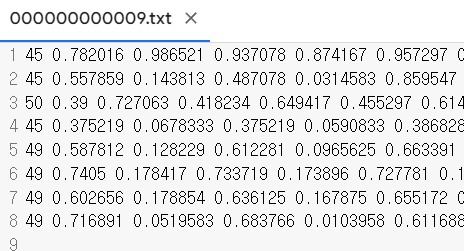


파일을 하나 불러와봅시다. 

In [3]:
with open("/content/datasets/coco128-seg/labels/train2017/000000000009.txt", "r") as file:
    lines = file.readlines()

In [4]:
# 분리해서 저장해보겠습니다. 
labels = []
for line in lines:
  parts = line.strip().split()  # 공백 제거 및 리스트 변환
  class_id = int(parts[0])
  points = parts[1:]
  labels.append([class_id, points])

pillow로 이미지에 폴리곤을 그려보겠습니다. 

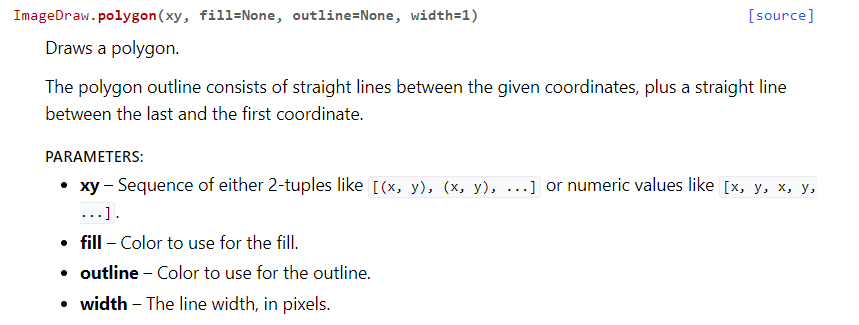

In [9]:
from PIL import ImageDraw, Image

# 이미지 불러오기, 투명도 적용을 위해 RGBA 형태로 변환
image = Image.open("/content/datasets/coco128-seg/images/train2017/000000000009.jpg")
draw = ImageDraw.Draw(image, 'RGBA')  

# 이미지 사이즈 가져오기
width, height = image.size

for label in labels:
  y = str(label[0]) # class

  # 포인트를 str--> float 변환 및 width, height 곱해서 원래 크기로
  polygon = [(int(float(label[1][i])*width), int(float(label[1][i+1])*height)) for i in range(0, len(label[1]), 2)]

  draw.polygon(polygon, fill=(255, 0, 0, 200), outline=(0, 0, 0) ) # R,G,B,A 투명도 0~255
  

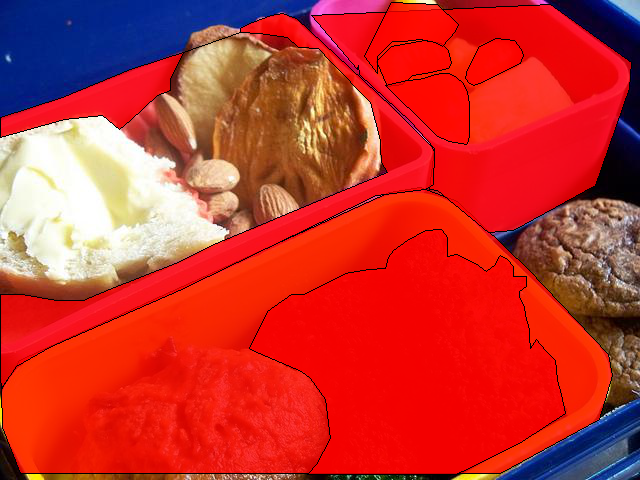

In [10]:
image.show()